In [2]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
CR = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(CR.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(CR.describe())
# Lista de columnas del DataFrame
print(CR.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())

# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
fees = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(fees.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(fees.describe())
# Lista de columnas del DataFrame
print(fees.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [ ]:
CR.info()
CR['status'].unique()

El database cash request deberia tener una columna de 'reason' Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.

Pero no parece existir

En status no aparecen los valores: 'approved', 'money_sent', 'pending', 'waiting_user_confirmation','waiting reimbursement', 'active'

cash_request_debited_date no aparece

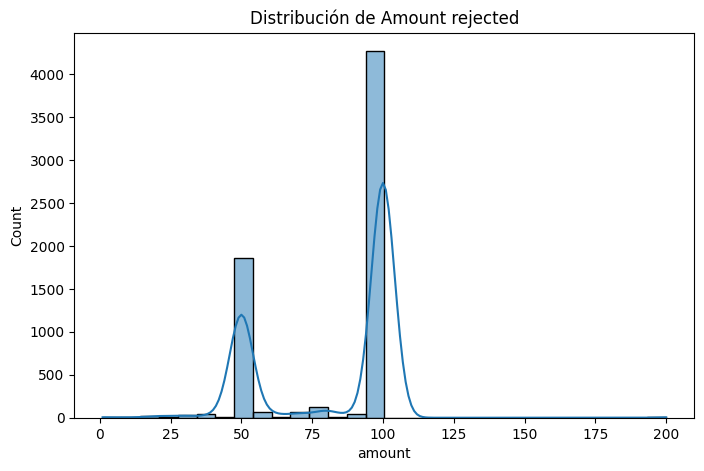

status
rejected    6568
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

rejected=CR[CR['status']=='rejected'].reset_index()

# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(rejected['amount'], bins=30, kde=True)
plt.title('Distribución de Amount rejected')
plt.show()

# Conteo de categorías en 'status'
print(rejected['status'].value_counts())

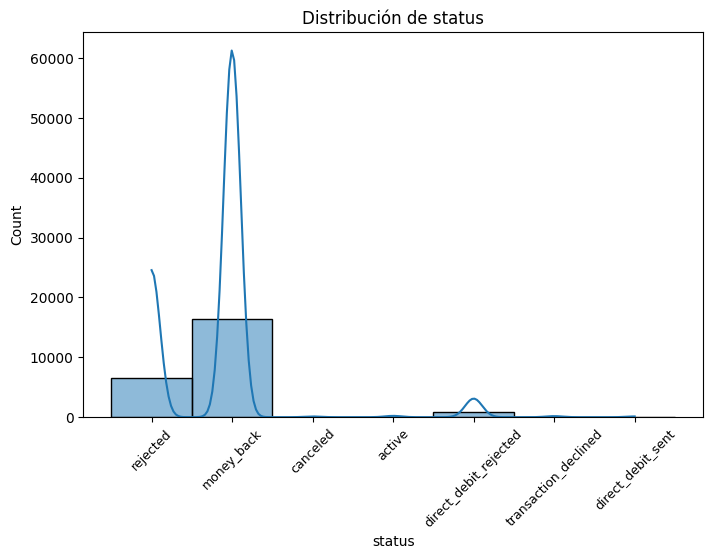

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(CR['status'], bins=30, kde=True)
plt.title('Distribución de status')
plt.xticks(rotation=45, fontsize=9)
plt.show()

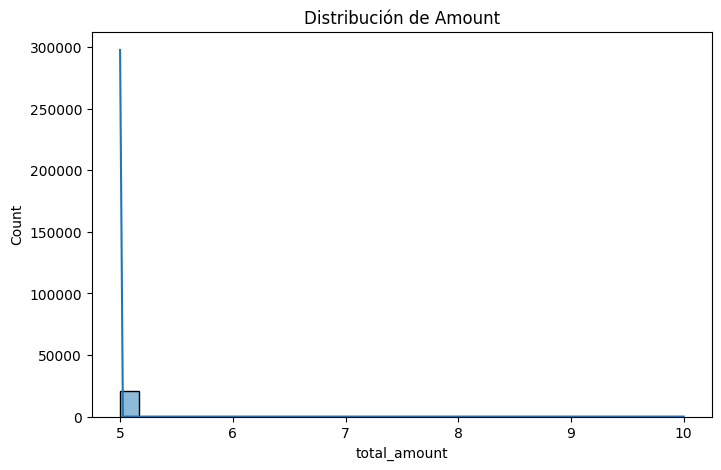

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64


In [6]:
# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(fees['total_amount'], bins=30, kde=True)
plt.title('Distribución de Amount')
plt.show()

# Conteo de categorías en 'status'
print(fees['total_amount'].value_counts())

todas las transacciones con fees (exceptop una) tienen una fee asociada de 5 (puede ser porcentaje)

In [53]:
#top 5 de usuarios que tienen cuenta activa y que han pedido más vecés retirada de efectivo y han gastado más

freq_id=CR.groupby(['user_id']).agg(Num_Solicitudes=('user_id', 'count'), Total_request=('amount','sum'), Total_rejected=('status',lambda x: (x=='rejected').sum())).reset_index()

top_5_amount=freq_id.sort_values(by='Total_request', ascending=False).head(5)

top_5_n_sol=freq_id.sort_values(by='Num_Solicitudes', ascending=False).head(5)



top_5_amount

,user_id,Num_Solicitudes,Total_request,Total_rejected
1912,13851.0,18,1750.0,15
365,2530.0,17,1600.0,10
165,1159.0,17,1565.0,11
2415,17329.0,15,1480.0,15
1344,9901.0,16,1410.0,13


vemos que los tops no coinciden. Las IDs que más veces han pedido no son las que más efectivo han retirado

In [8]:
deleted_accounts=CR.dropna(subset=['deleted_account_id']).reset_index()

freq_deleted_accounts= deleted_accounts.groupby(['deleted_account_id']).agg(Num_Solicitudes=('deleted_account_id', 'count'), Total_request=('amount', 'sum'), Total_rejected=('status',lambda x: (x=='rejected').sum())).reset_index()

top_5_del_amount=freq_deleted_accounts.sort_values(by='Total_request', ascending=False).head(5)

top_5_del_amount


,deleted_account_id,Num_Solicitudes,Total_request,Total_rejected
620,6334.0,19,1750.0,17
843,11444.0,16,1450.0,14
335,3767.0,16,1245.0,15
1033,24168.0,13,1150.0,6
384,4047.0,15,1010.0,14


,index,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,n_rejects
0,7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
1,8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
2,19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
3,21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
4,25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00,1347
2100,23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN,1347
2101,23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN,1347
2102,23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN,1347


In [64]:
CR[CR['deleted_account_id']==6334.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
4450,12224,100.0,rejected,2020-08-12 15:35:58.23708+00,2020-08-13 07:57:34.36487+00,NaN,2020-08-13 07:57:34.360066+00,6334.0,2020-08-26 03:36:06.789+00,NaN,NaN,regular,2020-08-19 15:35:58.205186+00,NaN,NaN,NaN
5048,12314,100.0,rejected,2020-08-13 09:29:02.883646+00,2020-08-13 10:47:36.315685+00,NaN,2020-08-13 10:47:36.311645+00,6334.0,2020-08-27 09:29:11.095+00,NaN,NaN,regular,2020-08-20 09:29:02.856742+00,NaN,NaN,NaN
6705,11686,100.0,rejected,2020-08-10 12:00:54.322249+00,2020-08-10 14:49:38.326261+00,NaN,2020-08-10 14:49:38.324118+00,6334.0,2020-08-24 00:01:08.341+00,NaN,NaN,instant,2020-08-17 12:00:54.321855+00,NaN,NaN,NaN
6706,11777,100.0,rejected,2020-08-10 16:57:27.936787+00,2020-08-11 09:05:17.904447+00,NaN,2020-08-11 09:05:17.901836+00,6334.0,2020-08-24 04:57:36.273+00,NaN,NaN,instant,2020-08-17 16:57:27.936373+00,NaN,NaN,NaN
6707,11910,100.0,rejected,2020-08-11 09:29:25.121902+00,2020-08-11 09:43:58.710107+00,NaN,2020-08-11 09:43:58.707145+00,6334.0,2020-08-25 09:29:46.196+00,NaN,NaN,regular,2020-08-18 09:29:25.121486+00,NaN,NaN,NaN
6708,11931,100.0,rejected,2020-08-11 10:22:21.001039+00,2020-08-11 10:30:10.695923+00,NaN,2020-08-11 10:30:10.693197+00,6334.0,2020-08-25 10:22:29.53+00,NaN,NaN,regular,2020-08-18 10:22:21.00066+00,NaN,NaN,NaN
6709,11947,100.0,rejected,2020-08-11 11:24:28.822363+00,2020-08-11 15:12:01.626289+00,NaN,2020-08-11 15:12:01.623551+00,6334.0,2020-08-24 23:24:37.298+00,NaN,NaN,regular,2020-08-18 11:24:28.821677+00,NaN,NaN,NaN
7101,12020,100.0,rejected,2020-08-11 15:13:13.730299+00,2020-08-11 16:13:47.823332+00,NaN,2020-08-11 16:13:47.821051+00,6334.0,2020-08-25 03:13:21.883+00,NaN,NaN,regular,2020-08-18 15:13:13.72995+00,NaN,NaN,NaN
7102,12056,100.0,rejected,2020-08-11 18:16:02.455746+00,2020-08-12 09:29:48.374668+00,NaN,2020-08-12 09:29:48.370337+00,6334.0,2020-08-25 06:16:19.918+00,NaN,NaN,regular,2020-08-18 18:16:02.455307+00,NaN,NaN,NaN
7103,12153,90.0,rejected,2020-08-12 10:13:05.295289+00,2020-08-12 11:12:37.865758+00,NaN,2020-08-12 11:12:37.863095+00,6334.0,2020-08-26 10:13:18.014+00,NaN,NaN,regular,2020-08-19 10:13:05.29491+00,NaN,NaN,NaN


In [13]:
CR[CR['user_id']==13851.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
1733,3140,100.0,rejected,2020-06-12 10:49:49.546005+00,2020-06-12 14:05:53.079386+00,13851.0,2020-06-12 14:05:53.075244+00,NaN,2020-06-22 10:49:49.540608+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1957,4715,100.0,rejected,2020-06-22 22:34:00.124303+00,2020-06-23 11:05:28.905169+00,13851.0,2020-06-23 11:05:28.901354+00,NaN,2020-07-14 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2270,8019,100.0,rejected,2020-07-14 16:35:41.906818+00,2020-07-14 18:22:14.38471+00,13851.0,2020-07-14 18:22:14.382005+00,NaN,2020-08-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2535,7254,100.0,rejected,2020-07-09 00:58:16.178629+00,2020-07-09 08:56:11.477093+00,13851.0,2020-07-09 08:56:11.475016+00,NaN,2020-08-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2575,6509,100.0,rejected,2020-07-03 18:17:35.28196+00,2020-07-04 16:15:55.129013+00,13851.0,2020-07-04 16:15:55.12503+00,NaN,2020-07-14 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2601,7549,100.0,rejected,2020-07-11 01:50:18.047417+00,2020-07-11 12:20:12.127944+00,13851.0,2020-07-11 12:20:12.125579+00,NaN,2020-08-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2771,6637,100.0,rejected,2020-07-05 08:33:42.552569+00,2020-07-05 18:03:43.250043+00,13851.0,2020-07-05 18:03:43.246729+00,NaN,2020-07-14 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2787,6882,100.0,rejected,2020-07-07 09:55:24.504241+00,2020-07-07 09:56:17.002556+00,13851.0,2020-07-07 09:56:17.000222+00,NaN,2020-07-14 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2797,7327,100.0,rejected,2020-07-09 13:00:49.589252+00,2020-07-09 16:46:46.836789+00,13851.0,2020-07-09 16:46:46.834097+00,NaN,2020-08-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2803,7394,100.0,rejected,2020-07-09 21:08:10.744298+00,2020-07-10 06:50:24.772035+00,13851.0,2020-07-10 06:50:24.769131+00,NaN,2020-08-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


vemos que si sumamos el amount que piden el top 5 IDs que más efectivo han retirado la mayoria de sus operaciones han sido denegadas.

Vamos a ver qué pasa cuando hacemos el top 5 de monto de IDs a los que sí se les han aceptado

In [3]:

g=CR.groupby(['user_id'])

top_5_accept=g.apply(lambda x: x[x['status']=='money_back']['amount'].sum())



/tmp/ipykernel_1801/1277312474.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_accept=g.apply(lambda x: x[x['status']=='money_back']['amount'].sum())


In [6]:
top_5_accept.sort_values(ascending=False).head(10)

user_id
1946.0    1100.0
274.0     1100.0
4297.0    1000.0
90.0      1000.0
1267.0    1000.0
3617.0    1000.0
92.0      1000.0
1987.0    1000.0
1795.0    1000.0
2011.0    1000.0
dtype: float64

In [14]:
h=deleted_accounts.groupby(['deleted_account_id'])

top_10_rejected=h.apply(lambda x: x[x['status']=='money_back']['amount'].sum())

/tmp/ipykernel_1801/4086669654.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_rejected=h.apply(lambda x: x[x['status']=='money_back']['amount'].sum())


In [15]:
top_10_rejected.sort_values(ascending=False).head(10)

deleted_account_id
21776.0    800.0
14798.0    650.0
20447.0    600.0
4217.0     580.0
24168.0    550.0
19704.0    500.0
17998.0    500.0
21453.0    500.0
20829.0    500.0
20077.0    500.0
dtype: float64